In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as pp
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
encoder = OneHotEncoder( sparse_output = False ).set_output( transform = 'pandas' )

In [3]:
pd.read_csv( 'data_treino_dv_df_2000_2010.csv' )

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19:00,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20:00,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21:00,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22:00,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


In [11]:
WindSpeed: pd.DataFrame = pd.read_csv( 'data_treino_dv_df_2000_2010.csv' )
WindSpeed.rename( columns = { 'HORA (UTC)': 'Hora', 
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'Direccion',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Velocidad',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Humedad Max',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Humedad Min',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temp Max',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temp Min',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Humedad Rel',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Presion',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'Precipitacion',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rafaga',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Presion Max',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Presion Min'
}, inplace = True )

ws = WindSpeed

hour = encoder.fit_transform(WindSpeed[['Hora']])
encoded = pd.DataFrame(hour, columns = encoder.get_feature_names_out(['Hora']))
WindSpeed = pd.concat([WindSpeed, encoded], axis=1).drop(columns=['Hora'])

In [5]:
palette = ['#F15152', '#EDB183', '#7FB285', '#3A2E39', '#1E555C']

# Velocidad del viento

Antes de seleccionar las variables a analizar se usarán pruebas estadísticas para identificar las variables mas influyentes en nuestra variable dependiente.

En primer lugar se hará uso de una prueba de normalidad para determinar que tipo de prueba se usará.

In [6]:
from scipy.stats import normaltest
Speed = WindSpeed['Velocidad']
stat, pval = normaltest( Speed )
print( f'Resultados de la prueba:\nEstadístico: {stat}\nP-Valor: {pval}' )

Resultados de la prueba:
Estadístico: 1925.665458692347
P-Valor: 0.0


Dado que el p-valor es inferior al $\alpha$ (0.05), la variable respuesta no pertenece a una distribución normal, por lo tanto se hará uso de pruebas no paramétricas.

En el caso de las variables continuas, se hará uso de la prueba de correlación de spearman. Para agilizar la identificación, se mostrarán los resultados por medio de un mapa de correlación y solo se escogerán aquellas variables con correlación media o fuerte con respecto a la velocidad.

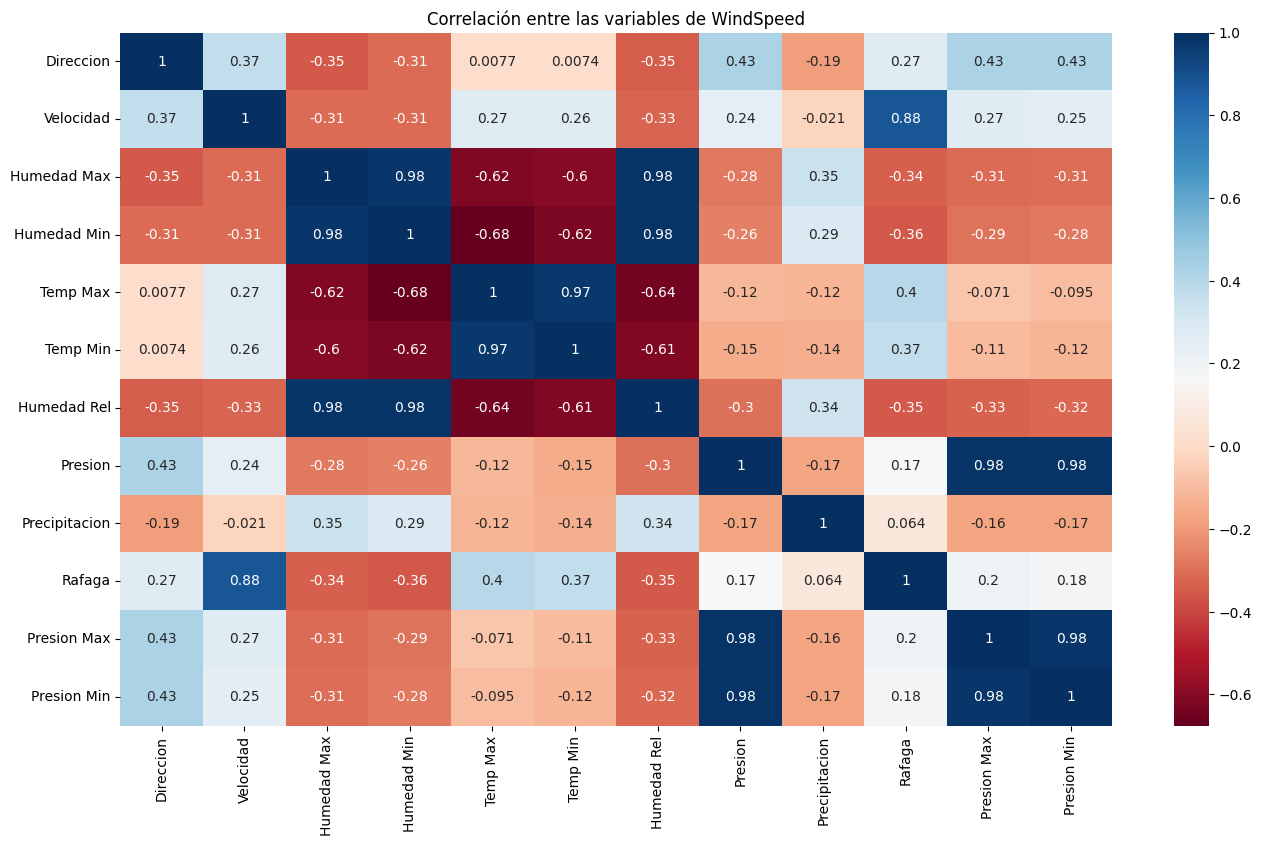

In [12]:
pp.figure( figsize=(16,9) )
sb.heatmap( ws.drop( columns = ['Hora'] ).corr( method = 'spearman' ), cmap = 'RdBu', annot = True )
pp.title( 'Correlación entre las variables de WindSpeed' )
pp.show()

Es evidente que estas variables son la ráfaga máxima del viento, la humedad relativa máxima, mínima y horaria, y la dirección del viento.

Por otro lado, se hará uso de una prueba de Kruskal-Wallis para ver si hay diferencia significativa del viento según la hora.

In [ ]:
from scipy.stats import kruskal

hours = WindSpeed['Hora'].unique()
speed = [WindSpeed[WindSpeed['Hora'] == hour]['Velocidad'] for hour in hours]

stat, pval = kruskal(*speed)
print( f'Resultados de la prueba:\nEstadístico: {stat}\nP-Valor: {pval}' )

Resultados de la prueba:
Estadístico: 19214.42123030443
P-Valor: 0.0


Dado que el p-valor es inferior al $\alpha$, se encuentra que hay diferencia significativa entre los grupos.

## Análisis Exploratorio

En primer lugar podemos observar el comportamiento de estas variables más influyentes, en términos de media, desviación, mediana y quartiles por medio de la función `describe()`.

In [ ]:
RelWindSpeed = WindSpeed[['Velocidad','Rafaga','Humedad Max','Humedad Min','Humedad Rel', 'Direccion']].copy()
RelWindSpeed.describe()

,Velocidad,Rafaga,Humedad Max,Humedad Min,Humedad Rel,Direccion
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,2.466192,5.161076,69.058465,63.176194,66.146682,0.405810
std,1.313968,2.311157,19.640222,20.166336,19.992327,0.686247
min,0.000000,0.000000,12.000000,10.000000,10.000000,-1.000000
25%,1.500000,3.400000,54.000000,48.000000,51.000000,-0.156434
50%,2.400000,5.000000,72.000000,64.000000,68.000000,0.788011
75%,3.400000,6.800000,87.000000,80.000000,84.000000,0.970296
max,10.000000,24.300000,100.000000,98.000000,99.000000,1.000000


Podemos resaltar que a nivel general, las desviaciones estandar son inferiores a la media, por lo que se pueden considerar relativamente pequeñas. Del mismo modo, no hay diferencia marcada entre la media y la mediana de la mayoria de variables, por lo que se puede preveer una simetría en la distribución de los datos. Como excepciíon está la dirección, cuya desviación es un 70% más grande que su media. Por otro lado, se prevee una asimetria positva, ya que su media es inferior a su mediana.

En cuanto a datos faltantes, es facil comprobar que ninguna variable presenta fallos, es decir, no hay necesidad de inputar.

In [ ]:
WindSpeed.isna().sum()

Hora             0
Direccion        0
Velocidad        0
Humedad Max      0
Humedad Min      0
Temp Max         0
Temp Min         0
Humedad Rel      0
Presion          0
Precipitacion    0
Rafaga           0
Presion Max      0
Presion Min      0
dtype: int64

### Velocidad del viento

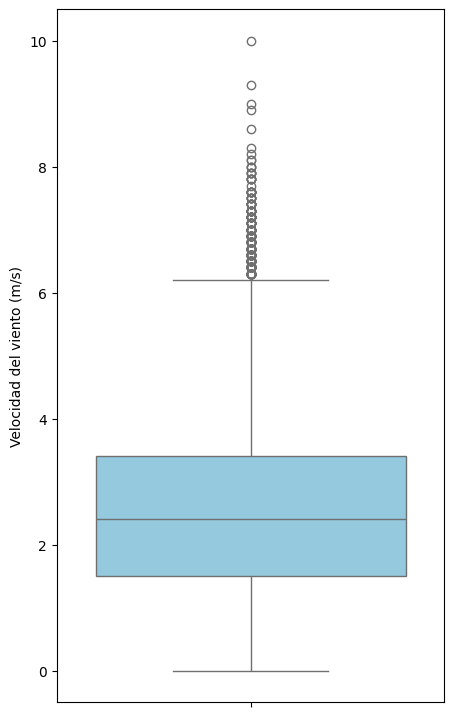

In [ ]:
pp.figure( figsize=(5,9) )
sb.boxplot( data = WindSpeed['Velocidad'], color = palette[0])
pp.ylabel('Velocidad del viento (m/s)')
pp.show()

A diferencia de lo que se esperaba, la variable presenta una asimetría positiva marcada, como se ve en la gráfica. Este comportamiento se presenta dada la gran cantidad de datos atípicos que corren la media hacia la mediana.

### Humedad

Dado que las variables comparten rangos y mediciones similares, es posible compararlas en una misma gráfica.

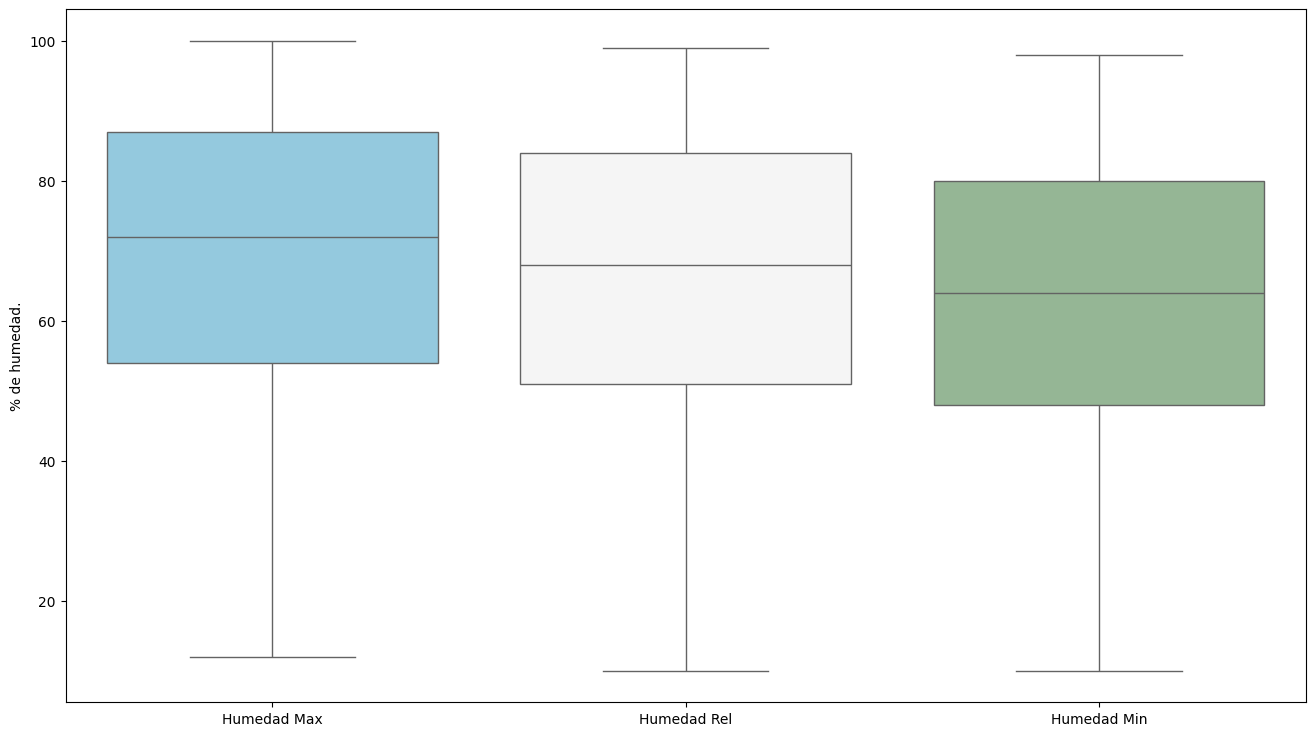

In [ ]:
pp.figure(figsize=(16,9))
sb.boxplot( data = WindSpeed[['Humedad Max', 'Humedad Rel', 'Humedad Min' ]], palette = palette[:3] )
pp.ylabel('% de humedad.')
pp.show()

Como se puede notar, hay diferencias marcadas entre los grupos, aunque es un comportamiento esperado, como lo sugieren los propios nombres de las variables. También es notoria la ausencia de datos atípicos.

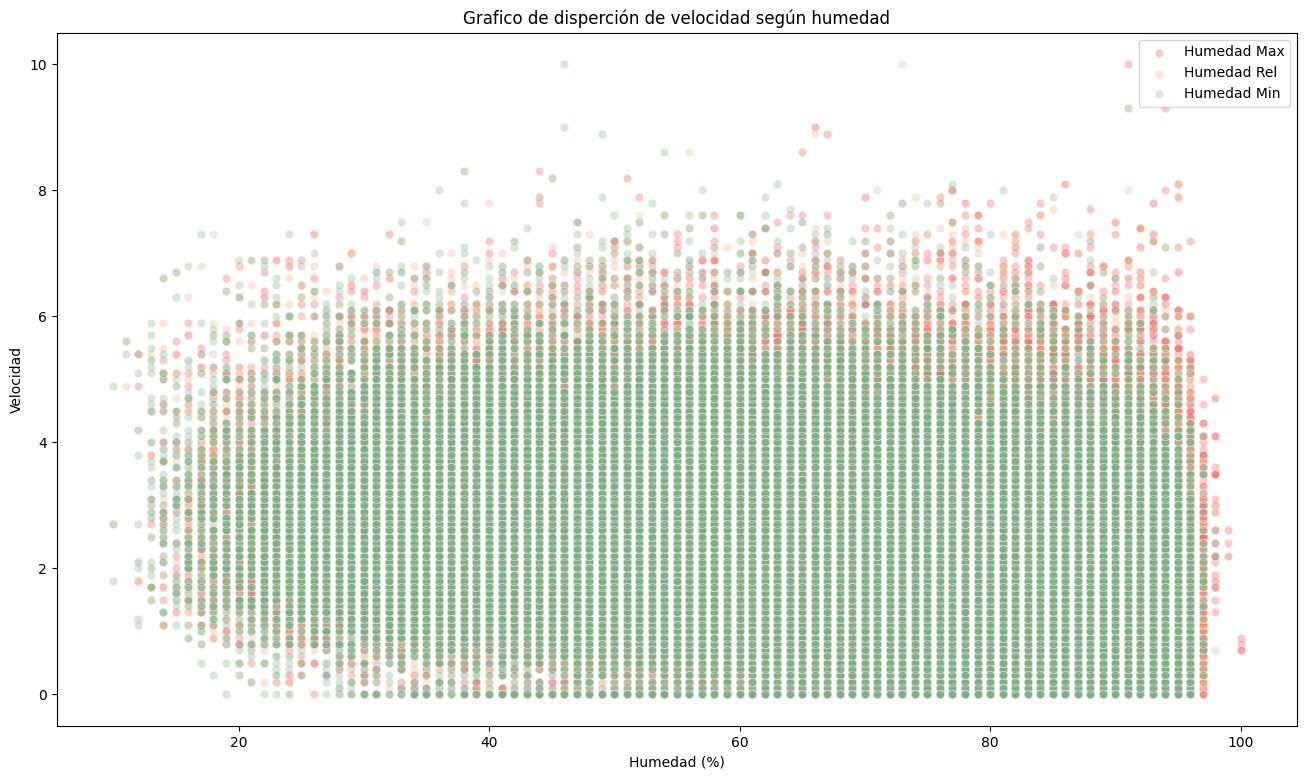

In [ ]:
pp.figure( figsize = (16,9) )
for i, category in enumerate( ['Humedad Max', 'Humedad Rel', 'Humedad Min' ] ):
    sb.scatterplot( data = WindSpeed, x = category, y = 'Velocidad', color = palette[i], label = category, alpha = 0.3  )
pp.title( 'Grafico de disperción de velocidad según humedad' )
pp.xlabel( 'Humedad (%)' )
pp.ylabel( 'Velocidad' )
pp.show()

Es evidente que se sigue una correlación bastante debil, dada la dispersión de los puntos independientemente de la variable.

### Ráfaga

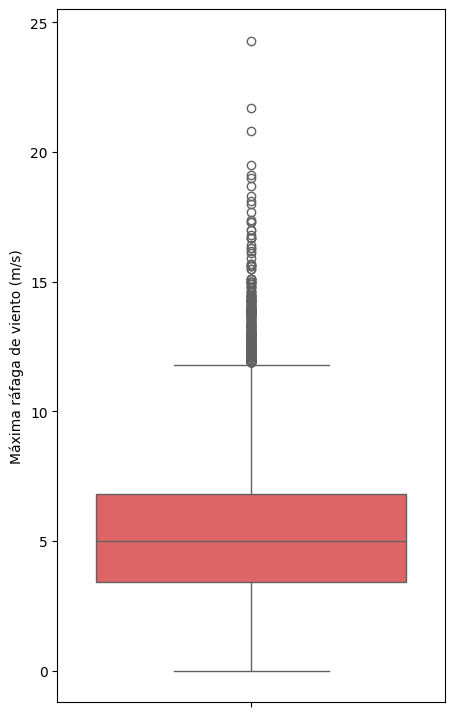

In [ ]:
pp.figure( figsize=(5,9) )
sb.boxplot( data = WindSpeed['Rafaga'], color = palette[0])
pp.ylabel('Máxima ráfaga de viento (m/s)')
pp.show()

Así como en el caso de la variable dependiente, podemos ver una cantidad grande de puntos atípicos hacia la derecha, lo que causa la asimetría positiva.

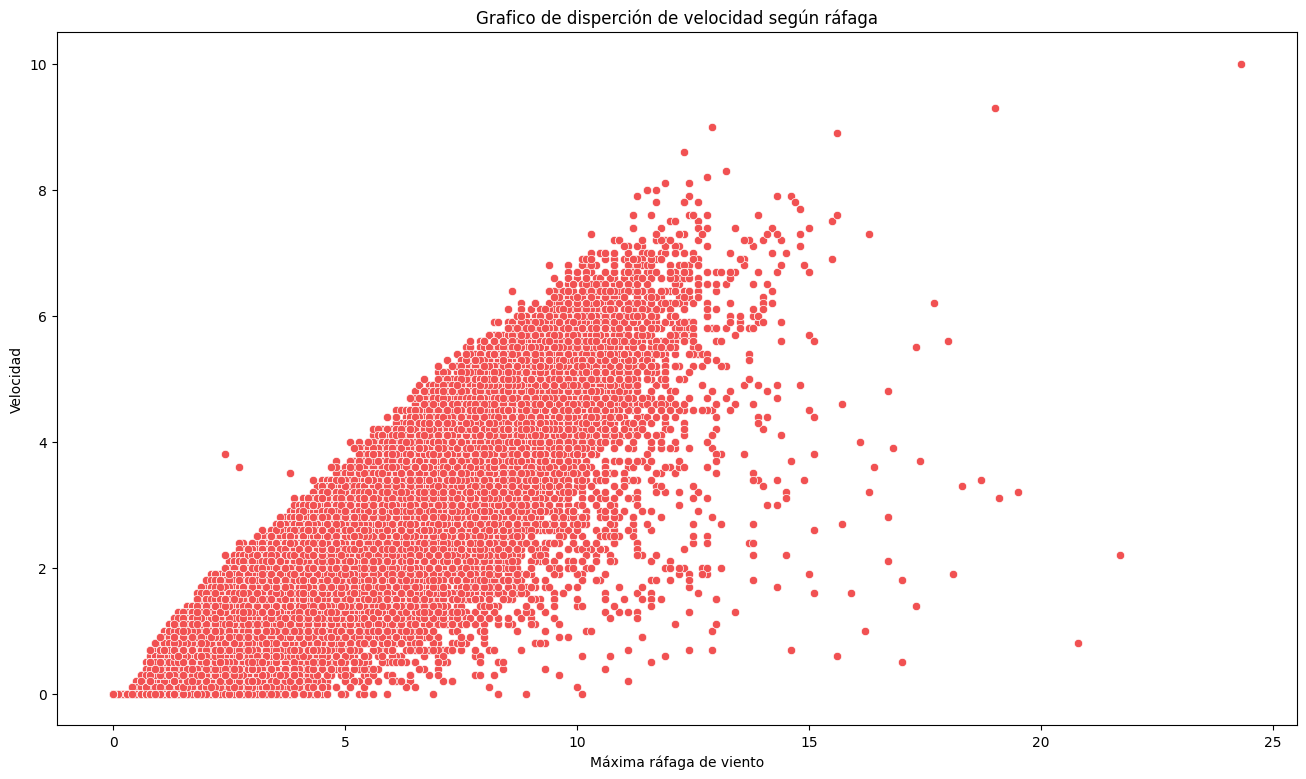

In [15]:
pp.figure( figsize = (16,9) )
sb.scatterplot( data = WindSpeed, x = 'Rafaga', y = 'Velocidad', color = palette[0]  )
pp.title( 'Grafico de disperción de velocidad según ráfaga' )
pp.xlabel( 'Máxima ráfaga de viento' )
pp.ylabel( 'Velocidad' )
pp.show()

## Eliminación de variables

Se hará uso de la función `variance_inflation_factor()` para eliminar variables que presenten alta colinealidad para reducir el modelo en lo posible.

In [20]:
x = WindSpeed.copy().drop( columns = 'Velocidad' )
y = WindSpeed['Velocidad']

In [21]:
while True:
    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['Valor'] = [ variance_inflation_factor( x.values, i ) for i in range( x.shape[1] ) ]
    if vif.max()['Valor'] < 5: break
    else:
        var = vif.max()['Variable']
        val = vif.max()['Valor']
        print( f'Se elimina { var } con un VIF de { val }' )
        x = x.drop( columns = var )
print( 'Matriz resultante:' )
x

Se elimina Temp Min con un VIF de 4109.619639807946
Se elimina Temp Max con un VIF de 4108.85135764329
Se elimina Rafaga con un VIF de 3614.6125897884676
Se elimina Presion Min con un VIF de 3613.2107252424953
Se elimina Presion Max con un VIF de 3422.6849612504425
Se elimina Presion con un VIF de 2654.3047568568445
Se elimina Precipitacion con un VIF de 69.97029034210517
Se elimina Humedad Rel con un VIF de 68.79480864509135
Se elimina Humedad Min con un VIF de 26.8470427742619
Matriz resultante:


,Direccion,Humedad Max,Hora_00:00,Hora_01:00,Hora_02:00,Hora_03:00,Hora_04:00,Hora_05:00,Hora_06:00,Hora_07:00,...,Hora_14:00,Hora_15:00,Hora_16:00,Hora_17:00,Hora_18:00,Hora_19:00,Hora_20:00,Hora_21:00,Hora_22:00,Hora_23:00
0,0.809017,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965926,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.891007,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.848048,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.224951,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,-0.615661,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87689,-0.469472,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87690,-0.484810,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87691,-0.484810,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
vif

,Variable,Valor
0,Direccion,1.183372
1,Humedad Max,1.585993
2,Hora_00:00,1.929822
3,Hora_01:00,1.990094
4,Hora_02:00,2.037843
5,Hora_03:00,2.075984
6,Hora_04:00,2.111718
7,Hora_05:00,2.151399
8,Hora_06:00,2.185194
9,Hora_07:00,2.216864


## Modelos de regresión

La partición sugerida por la guía se puede conseguir programando manualmente de la siguiente forma:

In [23]:
# 7, 14 y 21 dias, train: 1
# ( 0-6, 7 ), ( 0-13, 14 ), ( 0-20, 21 ) 
# 168, 336 y 504 horas, train: 24
# ( 0-143, 144-167 ), ( 0-311, 312-335 ), ( 0-479, 480-503 )

CVSplits = [
    [
        (
            [ j for j in range( k*i , k*(i+1) ) ], 
            [ j for j in range( k*(i+1), k*(i+1) + 24 ) ]
        ) 
        for i in range( len(x)//k ) 
    ]
    for k in [ 168, 336, 504 ]
]

Nótese que se usan los valores de 168, 336 y 504 que son la cantidad de horas que hay en 7, 14 y 21 días respectivamente.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, make_scorer

from numpy import mean

### Regresión Lineal

In [25]:
scorers = {
    'RMSE': make_scorer( mean_absolute_percentage_error ),
    'MAPE': make_scorer( mean_squared_error ),
    'R2': make_scorer( r2_score )
}

linearScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for scorer in scorers:
    row = []
    for CVSplit in CVSplits:
        scores = cross_val_score( LinearRegression(), x, y, cv = CVSplit, scoring = scorers[scorer] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    linearScores.loc[ scorer ] = row

linearScores

,T = 7,T = 14,T = 21
RMSE,6.360822e+06,6.121072e+06,6.619809e+06
MAPE,1.338140e+00,1.271841e+00,1.276728e+00
R2,-4.520518e-01,-3.948834e-01,-4.020871e-01


### Regresión k-NN

Dado que se hará una busqueda por parámetros, se tomará la ultima partición de cada split y se considerará como conjunto de prueba. Al usar índices manuales, se tiene un control certero sobre cuales observaciones están entrado al modelo, por lo que solo es necesario eliminar el ultimo set de particiones y tomar los respectivos índices entre los datos para obtener un set de testeo aislado.

In [26]:
x_test, y_test = [],[]
for c in CVSplits:
    row = c[-1]
    x_test.append( x.iloc[ row[0][0]:row[1][-1] + 1 ] )
    y_test.append( y[ row[0][0]:row[1][-1] + 1 ] )
GridCVSplits = [c[:-1] for c in CVSplits]

Dado que el RMSE es la métrica de evaluación, solo se buscará el mejor score en los tres periodos y posteriormente se calcularán las métricas adicionales.

In [27]:
knnScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for i in range( 1, 16 ):
    row = []
    for CVSplit in GridCVSplits:
        scores = cross_val_score( KNeighborsRegressor( n_neighbors = i ), x, y, cv = CVSplit, scoring = scorers['RMSE'] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    knnScores.loc[ i ] = row

knnScores

,T = 7,T = 14,T = 21
1,1.761745e+14,1.917797e+14,1.839406e+14
2,1.860622e+14,1.971412e+14,1.945778e+14
3,1.885521e+14,1.952816e+14,2.024511e+14
4,1.911053e+14,1.948408e+14,2.006873e+14
5,1.947807e+14,1.994161e+14,2.021601e+14
6,2.001299e+14,2.009328e+14,2.002327e+14
7,2.003112e+14,2.038999e+14,1.985910e+14
8,1.996082e+14,2.053825e+14,2.019828e+14
9,1.999715e+14,2.086932e+14,2.036148e+14
10,2.006484e+14,2.094724e+14,2.061204e+14


Como se puede ver en la tabla, los mejores resultados están provistos por 1-nn, a pesar que presente un score terrible. Esto se puede dar gracias al hecho que los algoritmos k-NN requieren de una gran cantidad de datos para poder hacer un buen proceso de votación.

Las métricas finales del modelo resultan de la siguiente manera:

In [28]:
knnScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for scorer in scorers:
    row = []
    for i, CVSplit in enumerate( CVSplits ):
        scores = cross_val_score( KNeighborsRegressor( n_neighbors = 1 ), x_test[i], y_test[i], cv = [ CVSplit[0] ], scoring = scorers[scorer] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    knnScores.loc[ scorer ] = row

knnScores

,T = 7,T = 14,T = 21
RMSE,0.672901,1.061002,0.795981
MAPE,1.279167,2.119167,2.141250
R2,-1.328183,-0.859031,-0.444621


Así como en el modelo anterior, el $R^2$ arroja un resultado negativo, aún así, este modelo presenta un mejor RMSE que además cae dentro del rango, por lo que supera como modelo al modelo de regresión lineal.

### Regresión Ridge

Al igual que en el modelo $k-nn$, se hará uso de una busqueda de parámetros, en este caso $\alpha$. Por tanto, se usará la misma estrategia que en el modelo anterior. Ahora bien, se hará uso de una escala exponencial.

In [29]:
ridgeScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for i in range( -10, 1 ):
    row = []
    for CVSplit in GridCVSplits:
        scores = cross_val_score( Ridge( alpha = 10**i ), x, y, cv = CVSplit, scoring = scorers['RMSE'] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    ridgeScores.loc[ f'10^{i}' ] = row

ridgeScores

,T = 7,T = 14,T = 21
10^-10,1.524255e+14,1.559666e+14,1.651258e+14
10^-9,1.524255e+14,1.559666e+14,1.651258e+14
10^-8,1.524255e+14,1.559666e+14,1.651258e+14
10^-7,1.524255e+14,1.559666e+14,1.651258e+14
10^-6,1.524255e+14,1.559666e+14,1.651258e+14
10^-5,1.524255e+14,1.559666e+14,1.651258e+14
10^-4,1.524253e+14,1.559668e+14,1.651261e+14
10^-3,1.524237e+14,1.559684e+14,1.651284e+14
10^-2,1.524084e+14,1.559841e+14,1.651519e+14
10^-1,1.523297e+14,1.561402e+14,1.653842e+14


Es evidente que con valores por debajo de $10^{-5}$, la métrica es esencialmente la misma, por lo que se asumirá este límite como la mejor y se tomará el respectivo $\alpha$

In [30]:
ridgeScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for scorer in scorers:
    row = []
    for i, CVSplit in enumerate( CVSplits ):
        scores = cross_val_score( Ridge( alpha = 10**(-5) ), x_test[i], y_test[i], cv = [ CVSplit[0] ], scoring = scorers[scorer] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    ridgeScores.loc[ scorer ] = row

ridgeScores

,T = 7,T = 14,T = 21
RMSE,0.524710,0.893263,0.741815
MAPE,0.372653,0.982765,1.285152
R2,0.321743,0.137873,0.132956


Dado que se tiene un modelo con aún menor RMSE y un $R^2$ positivo, se considera la regresión Ridge como el mejor modelo.

### Regresión Lasso

Se usará exactamente el mismo proceso que se hizo en la regresión Ridge, dadas las similitudes entre estos dos.

In [ ]:
lassoScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for i in range( -10, 1 ):
    row = []
    for CVSplit in GridCVSplits:
        scores = cross_val_score( Lasso( alpha = 10**i, max_iter = 10000 ), x, y, cv = CVSplit, scoring = scorers['RMSE'] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    lassoScores.loc[ f'10^{i}' ] = row

lassoScores

Así como en el caso anterior, a partir de valores inferiores a $10^{-7}$ el score relevante no cambia mucho, por lo que se usará este para el set de test.

In [32]:
lassoScores = pd.DataFrame( columns = ['T = 7', 'T = 14', 'T = 21'] )

for scorer in scorers:
    row = []
    for i, CVSplit in enumerate( CVSplits ):
        scores = cross_val_score( Ridge( alpha = 10**(-7), max_iter = 1000 ), x_test[i], y_test[i], cv = [ CVSplit[0] ], scoring = scorers[scorer] )
        if scorer == 'RMSE': scores = [ score**(1/2) for score in scores ]
        row.append( mean( scores ) )
    lassoScores.loc[ scorer ] = row

lassoScores

,T = 7,T = 14,T = 21
RMSE,0.524710,0.893263,0.741815
MAPE,0.372652,0.982765,1.285152
R2,0.321744,0.137873,0.132956


Sorprendentemente, se obtienen los mismos resultados que en la regresión anterior. Aún así, del $R^2$ podemos ver que ninguno de estos modelos con los periodos de tiempo sugeridos son confiables para estimar la velocidad del tiempo. Este problema puede ser resuelto cambiando el tipo de separación para la validación cruzada o simplemente incluyendo variables que aporten mejores estimaciones. Aún así podemos ver que hay una moda en cuanto a que el mejor periodo de validación es con un periodo de 7 dias. 

Para resumir los resultados, podemos ver la siguiente tabla:

In [38]:
FinalScores = pd.DataFrame( columns = ['RMSE','MAPE','R2'] )
FinalScores.loc['Ridge'] = ridgeScores.T.loc['T = 7']
FinalScores.loc['Lasso'] = lassoScores.T.loc['T = 7']
FinalScores.loc['Linear'] = linearScores.T.loc['T = 7']
FinalScores.loc['K-NN'] = knnScores.T.loc['T = 7']
FinalScores

,RMSE,MAPE,R2
Ridge,5.247101e-01,0.372653,0.321743
Lasso,5.247100e-01,0.372652,0.321744
Linear,6.360822e+06,1.338140,-0.452052
K-NN,6.729005e-01,1.279167,-1.328183
